<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Classification_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Four models:

 *   Logistic Rregression (LR)
 *   Random Forest (RF)
 *   Support Vectror Classification (SVR)
 *   Boosting
 *   Naive Bayes


In [1]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
# visualization
import plotly.express as px

[Data description](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)
print(df.data.shape)

(569, 30)


In [3]:
df.data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

## Checking with the unique y values (i.e the labels)

In [5]:
set(y)

{0, 1}

## Are the feature values scaled/normalized ?

In [6]:
X.min(), X.max()

(0.0, 4254.0)

## Let's normalize the features.

In [7]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

In [8]:
X_scaled.min(), X_scaled.max()

(0.0, 1.0000000000000002)

In [9]:
# replaing X with X_scaled
X = X_scaled

## (50-50) % Train-Test splits

In [10]:
# 50-50% split
train_test_split_point = len(X) // 2
# Split the data into training/testing sets
X_train = X[:train_test_split_point]
X_test = X[train_test_split_point:]
# Split the targets into training/testing sets
y_train = y[:train_test_split_point]
y_test = y[train_test_split_point:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284, 30), (285, 30), (284,), (285,))

## Training and Testing a LR model

In [11]:
# Create a logistic regression object
clf = LogisticRegression()
# Train the model using the training sets
clf.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Make predictions using the test set
y_pred = clf.predict(X_test)
# The mean squared error
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))

accuracy: 0.98


## Confusion Matrix

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

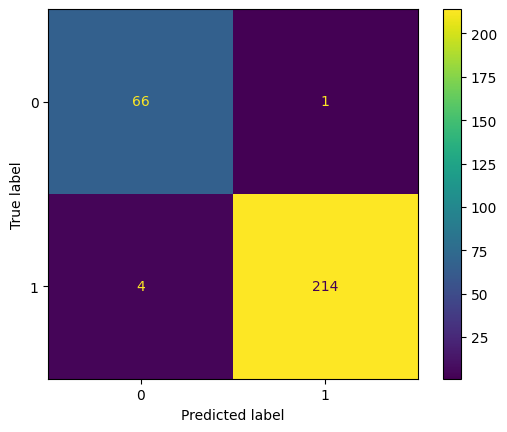

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

## Random splitting

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Our Wrapper Class (Can take any model as an input)

In [16]:
from sklearn.model_selection import cross_val_score

class myClassificationModel:
  def __init__(self, model):
    self.model = model
    self.nb_cv_splits = 5
    self.evaluation_metrics = 'f1'

  def train(self, X, y):
    self.model.fit(X, y)

  def evaluate(self, X, y):
    y_predict = self.model.predict(X)
    return f1_score(y, y_predict)

  def cv_score(self, X, y):
    return cross_val_score(self.model,
                           X,
                           y, scoring=self.evaluation_metrics,
                           cv=self.nb_cv_splits)



## Logistic Regression (LR)

In [17]:
my_model = myClassificationModel(LogisticRegression())
my_model.train(X_train, y_train)
print('train-f1', my_model.evaluate(X_train, y_train))
print('test-f1', my_model.evaluate(X_test, y_test))

train-f1 0.9780033840947546
test-f1 0.9710144927536232


In [18]:
# cross validation scores
cv_scores = my_model.cv_score(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.96551724 0.97260274 0.97959184 0.96598639 0.97222222]
cross validation score (mean): 0.9711840869240154
cross validation score (std): 0.005155767681153212


## Random Forest (RF)

In [19]:
my_model = myClassificationModel(RandomForestClassifier())
my_model.train(X_train, y_train)
print('train-f1', my_model.evaluate(X_train, y_train))
print('test-f1', my_model.evaluate(X_test, y_test))

train-f1 1.0
test-f1 0.9774436090225563


In [20]:
cv_scores = my_model.cv_score(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.94366197 0.95890411 0.98611111 0.97931034 0.9787234 ]
cross validation score (mean): 0.9693421883228087
cross validation score (std): 0.015728923260512118


## Support Vector Classifier (SVC)

In [21]:
my_model = myClassificationModel(SVC())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9880341880341881
test-error 0.9777777777777777


In [22]:
cv_scores = my_model.cv_score(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.97183099 0.97222222 0.99310345 0.97260274 0.98591549]
cross validation score (mean): 0.9791349778194703
cross validation score (std): 0.008773803902772838


## Boosting

In [23]:
my_model = myClassificationModel(GradientBoostingClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 1.0
test-error 0.9701492537313433


In [24]:
cv_scores = my_model.cv_score(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.94964029 0.95890411 0.97931034 0.98611111 0.98591549]
cross validation score (mean): 0.9719762692510538
cross validation score (std): 0.014950998652110943


## Naive Bayes

In [25]:
my_model = myClassificationModel(GaussianNB())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9593220338983051
test-error 0.9172932330827067


In [26]:
cv_scores = my_model.cv_score(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.92086331 0.93243243 0.96551724 0.95890411 0.9352518 ]
cross validation score (mean): 0.9425937782628907
cross validation score (std): 0.016857538155438098
